In [1]:
# Google API dashboard:
# https://console.cloud.google.com/apis/dashboard?project=my-project-1543901530556&consoleReturnUrl=https:%2F%2Fcloud.google.com%2Fmaps-platform%2F%3Fapis%3Dmaps%26project%3Dmy-project-1543901530556&consoleUI=CLOUD&duration=PT1H
# Google elevation request guide:
# https://developers.google.com/maps/documentation/elevation/intro#ElevationRequests

In [2]:
# Import all packages and helpter functions
import sys
sys.path.append('../')
from utils import *

In [3]:
node = pd.read_csv(raw_path + '5c_nodes2.csv')
print(node.shape)
node.head()

(888, 5)


,highway,osmid,x,y,geometry
0,NaN,3835445345,-117.709300,34.102974,POINT (-117.7092997 34.1029743)
1,NaN,2247762320,-117.708159,34.105097,POINT (-117.7081591 34.1050973)
2,NaN,2247762331,-117.705297,34.105227,POINT (-117.7052972 34.1052271)
3,NaN,2247762347,-117.712548,34.105507,POINT (-117.7125478 34.1055069)
4,NaN,2247762350,-117.707165,34.105559,POINT (-117.7071645 34.1055588)


In [4]:
elevations = [get_elevation(lat, lng) for lat,lng in zip(node['y'], node['x'])]
elevations[:5]

[381.6374206542969,
 390.7146911621094,
 396.798583984375,
 387.0149536132812,
 394.1032104492188]

/Users/zihaoxu/ENTER/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/zihaoxu/ENTER/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


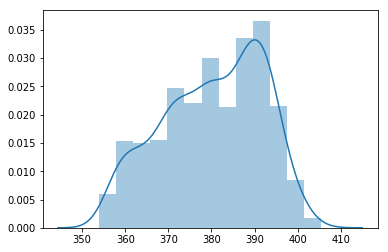

In [5]:
sns.distplot(elevations)

In [6]:
node['elevation'] = elevations
node.head()

,highway,osmid,x,y,geometry,elevation
0,NaN,3835445345,-117.709300,34.102974,POINT (-117.7092997 34.1029743),381.637421
1,NaN,2247762320,-117.708159,34.105097,POINT (-117.7081591 34.1050973),390.714691
2,NaN,2247762331,-117.705297,34.105227,POINT (-117.7052972 34.1052271),396.798584
3,NaN,2247762347,-117.712548,34.105507,POINT (-117.7125478 34.1055069),387.014954
4,NaN,2247762350,-117.707165,34.105559,POINT (-117.7071645 34.1055588),394.103210


In [7]:
node.to_csv(raw_path + '5c_nodes_elevation2.csv', index = None)